In [9]:
#!pip intsall tensorflow

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [13]:
(x_train,_),(x_test,_) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
x_train = x_train.astype('float')/255
x_test = x_test.astype('float')/255

In [18]:
import numpy as np
x_train_reshaped = np.reshape(a = x_train, newshape = (60000,28,28,1))
x_test_reshaped = np.reshape(a = x_test, newshape = (10000,28,28,1))

In [20]:
x_test_reshaped.shape, x_train_reshaped.shape

((10000, 28, 28, 1), (60000, 28, 28, 1))

In [21]:
import matplotlib.pyplot as plt

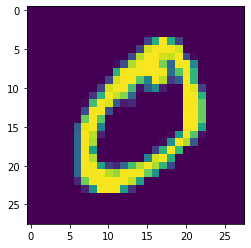

In [24]:
plt.imshow(x_train[1])
plt.show()

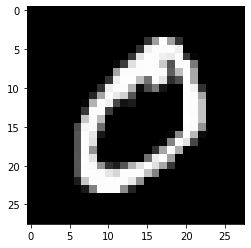

In [25]:
plt.imshow(x_train[1],cmap='gray')
plt.show()

## Step - To add Noise

In [34]:
x_train_noisy = x_train_reshaped + 0.2*np.random.normal(loc = 0,scale = 1.0, size = (60000,28,28,1))

In [36]:
x_test_noisy = x_test_reshaped + 0.2*np.random.normal(loc = 0,scale = 1.0, size = (10000,28,28,1))

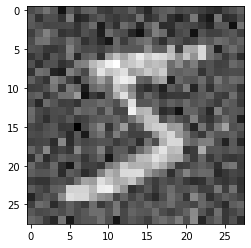

In [39]:
plt.imshow(x_train_noisy[0],cmap='gray')
plt.show()

## Clip you Image

In [40]:
x_train_clipped = np.clip(a = x_train_noisy, a_min = 0, a_max=3)

In [41]:
x_test_clipped = np.clip(a = x_test_noisy, a_min = 0, a_max=3)

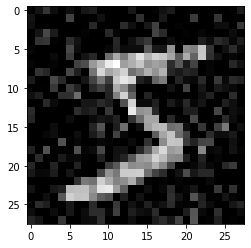

In [42]:
plt.imshow(x_train_clipped[0],cmap='gray')

# Model Building

## Encoding

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [80]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=32,kernel_size=(3,3),padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'same'))

In [76]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 4, 4, 8)        

### Decoder

In [81]:
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 8,kernel_size = (3,3),padding = 'same',strides = 1,activation = 'relu'))
model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = 'relu'))

model.add(UpSampling2D(size = (2,2)))
model.add(Conv2D(filters = 1,kernel_size = (3,3),strides = 1,padding='same', activation = 'relu'))


model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_64 (Conv2D)          (None, 14, 14, 8)         2312      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 7, 7, 8)           584       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 4, 4, 8)        

In [82]:
model.compile(optimizer='adam',loss=['mean_squared_error'])

In [83]:
model.fit(x=x_train_clipped,y=x_train,epochs=5, batch_size=32, validation_data=(x_test_clipped, x_test))

Epoch 1/5
1875/1875 [==============================] - 99s 52ms/step - loss: 0.0270 - val_loss: 0.0191
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0176 - val_loss: 0.0157
Epoch 3/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 4/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0141 - val_loss: 0.0137
Epoch 5/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0133 - val_loss: 0.0126


In [85]:
y_pred = model.predict(x_test_noisy)

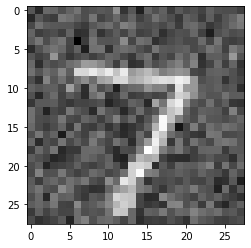

In [86]:
plt.imshow(x_test_noisy[0],cmap='gray')
plt.show()

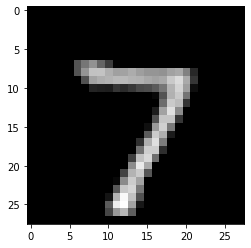

In [87]:
plt.imshow(y_pred[0],cmap='gray')
plt.show()

## The End